In [55]:
import pandas as pd 
import numpy as np
import seaborn as sns 
sns.set(style='white', palette='muted', color_codes=True)
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
import plotly.express as px

from sklearn.impute import SimpleImputer 
from sklearn.metrics import r2_score, accuracy_score, mean_squared_error
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder, MinMaxScaler 
from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split

In [56]:
data = pd.read_csv(r'c:\Github\Fullstack-Data-Analyst\Learning\the_data\data-lab-3-insurance.csv')
data.head(1)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.924


In [57]:
mis_col = data.isna().sum() * 100/len(data)
# mis_col.sort_values(ascending=False)

In [58]:
data.duplicated().sum()
data.drop_duplicates(subset=None, inplace=True, ignore_index=False, keep='first')
data.duplicated().sum()

0

In [59]:
# data.corr()['charges'].sort_values(ascending=False)

In [60]:
sex_val = data.sex 
smoke_val = data.smoker
reg_val = data.region

In [61]:
cat_val = ['sex', 'smoker', 'region']
data[cat_val] = data[cat_val].apply(LabelEncoder().fit_transform)

In [62]:
le_sex_val = data.sex 
orig_val = np.unique(sex_val)
le_val = np.unique(le_sex_val)

sex_dict = dict(zip(orig_val, le_val))
sex_dict

{'female': 0, 'male': 1}

In [63]:
data.corr()['charges'].sort_values(ascending=False)

charges     1.000000
smoker      0.787234
age         0.298308
bmi         0.198401
children    0.067389
sex         0.058044
region     -0.006547
Name: charges, dtype: float64

<AxesSubplot:>

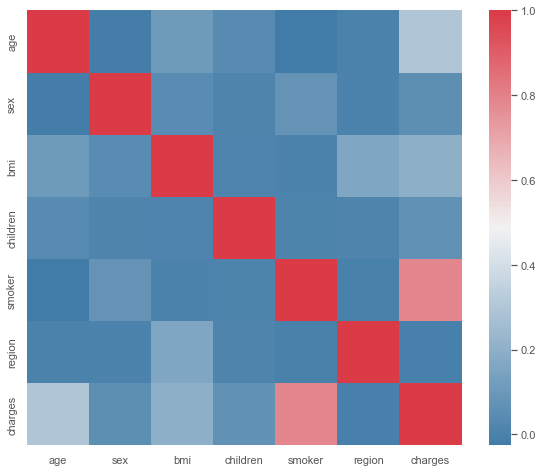

In [64]:
f,ax = plt.subplots(figsize=(10,8))

data_corr = data.corr()
sns.heatmap(data_corr, mask=np.zeros_like(data_corr, dtype=np.bool_), cmap=sns.diverging_palette(240,10, as_cmap=True), square=True, ax=ax)

Text(0.5, 1.0, 'Male Charges Distribution')

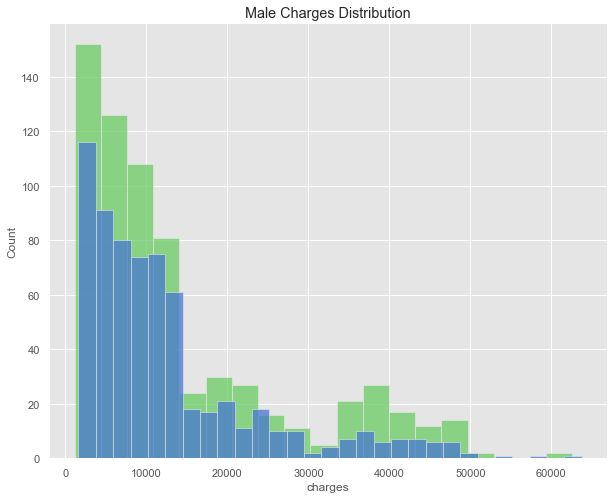

In [65]:
f,ax = plt.subplots(figsize=(10,8))

sns.histplot(data[(data.sex == 1)]['charges'], color='g', ax=ax)
ax.set_title('Male Charges Distribution')

sns.histplot(data[(data.sex == 0)]['charges'], color='b', ax=ax)
ax.set_title('Male Charges Distribution')